## BIA 656 Advanced Data Analytics and Machine Learning - Class Project

### *Authors: Aayush Bakre, Ajanya Sharma*

### Table of Contents
- Problem Description
- Evaluation
- Dataset
- Setup Imports & Variables
- Exploring the Data 

## Problem Discription

![alt text](https://gray-wafb-prod.cdn.arcpublishing.com/resizer/ELLb-0F79fu-eD2nA4_46JmkiJs=/1200x675/smart/filters:quality(85)/cloudfront-us-east-1.images.arcpublishing.com/gray/YT67CCYJY5FDNJDURKRAGZYETY.jpg)

### PPP Loan Fraud Detection

The Paycheck Protection Program (PPP) is a loan program created by the U.S. government in 2020 to help certain businesses, self-employed workers, sole proprietors, nonprofit organizations, and tribal businesses keep paying their workers during the COVID-19 pandemic. PPP loans are private loans with low interest rates that can be used to cover payroll costs, rent, interest, and utilities. The loan amount is based on the average monthly payroll costs of the applicant and can be forgiven if the business keeps its employee count and wages stable. The program is run by the U.S. Small Business Administration and the deadline to apply for a PPP loan was March 31, 2021.

The project is aimed at exploring loan data from the Paycheck Protection Program (PPP), which provided relief to small and medium-sized businesses during the COVID-19 pandemic. The primary objective is to create graphical visualizations of the data and apply anomaly detection methods to identify potentially fraudulent loans. The project outline suggests a few starting points, including reviewing news stories on fraud in the PPP loan program, downloading the full PPP loan dataset and data dictionary, summarizing the data through tabular summaries and graphical visualizations, investigating loans that have a high potential for fraud by grouping together loans in common categories and identifying outlier loans, and exploring the use of traditional unsupervised learning techniques such as anomaly detection.

## Evaluation

The dataset is a collection of entries on the PPP Loan Fraud application form. There is no training or a test dataset. Initial review doesn't point towards any strong correlations and predictors that would categorize the problem as a predictive or a dependence exerceise. At first glance, the dataset seems to be a good fit for unsupervised outlier detection methods just as the Project Brief suggests. 


## Dataset

The dataset is sourced from the official SBA website which can be accessed using the following URL:
https://data.sba.gov/dataset/ppp-foia/resource/aab8e9f9-36d1-42e1-b3ba-e59c79f1d7f0?inner_span=True

## Setup Imports and Variables

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import scipy as sp
import pandas as pd

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

## Explore the Data

### Read the Data

Read the first few entries

In [4]:
# Read in CSV file
df = pd.read_csv('/Users/aayush/Documents/Academics/Stevens/Semester 4/Advanced Data Analytics & Machine Learning/Project/Data/public_150k_plus_230101.csv')

# View first few rows of data
print(df.head())

   LoanNumber DateApproved  SBAOfficeCode ProcessingMethod  \
0  9547507704   05/01/2020            464              PPP   
1  9777677704   05/01/2020            464              PPP   
2  5791407702   05/01/2020           1013              PPP   
3  6223567700   05/01/2020            920              PPP   
4  9662437702   05/01/2020            101              PPP   

               BorrowerName        BorrowerAddress      BorrowerCity  \
0     SUMTER COATINGS, INC.  2410 Highway 15 South            Sumter   
1     PLEASANT PLACES, INC.    7684 Southrail Road  North Charleston   
2   BOYER CHILDREN'S CLINIC       1850 BOYER AVE E           SEATTLE   
3  KIRTLEY CONSTRUCTION INC   1661 MARTIN RANCH RD    SAN BERNARDINO   
4              AERO BOX LLC                    NaN               NaN   

  BorrowerState BorrowerZip LoanStatusDate  ...             BusinessType  \
0           NaN  29150-9662     12/18/2020  ...              Corporation   
1           NaN  29420-9000     09/28/2021

Read the last five entries

In [5]:
# View last few rows of data
print(df.tail())

        LoanNumber DateApproved  SBAOfficeCode ProcessingMethod  \
968526  4395967002   04/03/2020            897              PPP   
968527  6985647108   04/14/2020            897              PPP   
968528  7996438405   02/12/2021            897              PPS   
968529  9054647103   04/15/2020            897              PPP   
968530  9184687004   04/09/2020            897              PPP   

                                             BorrowerName  \
968526                           ROY E PAULSON, JR., P.C.   
968527  SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...   
968528                  ELECTRICAL SYSTEMS OF WYOMING INC   
968529                                     EDEN LIFE CARE   
968530                      S & S JOHNSON ENTERPRISES INC   

                      BorrowerAddress   BorrowerCity BorrowerState  \
968526                 102 N. Kenwood         CASPER            WY   
968527          1715 HITCHING POST DR    GREEN RIVER            WY   
968528              

Observed misread values in columns with dates. So next we call information about data types and missing values

In [6]:
# Get information about data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968531 non-null  int64  
 1   DateApproved                 968531 non-null  object 
 2   SBAOfficeCode                968531 non-null  int64  
 3   ProcessingMethod             968531 non-null  object 
 4   BorrowerName                 968527 non-null  object 
 5   BorrowerAddress              968517 non-null  object 
 6   BorrowerCity                 968519 non-null  object 
 7   BorrowerState                968518 non-null  object 
 8   BorrowerZip                  968518 non-null  object 
 9   LoanStatusDate               942818 non-null  object 
 10  LoanStatus                   968531 non-null  object 
 11  Term                         968531 non-null  int64  
 12  SBAGuarantyPercentage        968531 non-null  int64  
 13 

Now we call for summary statistics for the variables

In [8]:
# Get summary statistics for numerical columns
print(df.describe())

         LoanNumber  SBAOfficeCode           Term  SBAGuarantyPercentage  \
count  9.685310e+05  968531.000000  968531.000000               968531.0   
mean   5.427137e+09     571.519065      36.377761                  100.0   
std    2.551313e+09     263.024816      17.291796                    0.0   
min    1.000007e+09     101.000000       0.000000                  100.0   
25%    3.271108e+09     373.000000      24.000000                  100.0   
50%    5.400677e+09     515.000000      24.000000                  100.0   
75%    7.546303e+09     811.000000      60.000000                  100.0   
max    9.999007e+09    1094.000000     180.000000                  100.0   

       InitialApprovalAmount  CurrentApprovalAmount  UndisbursedAmount  \
count           9.685310e+05           9.685310e+05       9.684840e+05   
mean            5.322537e+05           5.306221e+05       1.515947e+01   
std             7.442514e+05           7.378871e+05       4.109778e+03   
min             0.0

We retrieve the exact counts of missing values for each variable. 

In [9]:
# Count the number of rows with missing values in each column
num_missing = df.isnull().sum(axis=0)

print(f"Total number of rows with missing values: {num_missing}")

Total number of rows with missing values: LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        4
BorrowerAddress                    14
BorrowerCity                       12
BorrowerState                      13
BorrowerZip                        13
LoanStatusDate                  25713
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  47
FranchiseName                  933126
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndic

Total number of observations with at least one missing variable

In [10]:
# Count the number of rows with missing values
num_rows_missing = (df.isnull().sum(axis=1) > 0).sum()

print(f"Total number of rows with missing values: {num_rows_missing}")

Total number of rows with missing values: 968530


Total number of rows with missing values is the same as the total observations in the dataset. This means that all observations have at least one null value. Upon looking closely at the dataset and the data dictionary, we can say that it may be because some of the variables are mutually exclusive responses to form questions. 

## Data Transformation and Feature Introduction

Given that we now have an overview of the dataset. We can now carried out initial tranformations which will alow us to break down and visualize individual elements of the dataset such as processing methods, approval dates, forgiveness dates, and loan amounts with respect to business size and employees. We can also use this opportunity to construct feature variables that may help us derive a more meaningful interpretation from the analysis.  

First, we transform columns with misinterpreted dates to correctly identify and validaate date values 

In [7]:
# Transform columns with date values from Object DType to DateTime DType

df[['DateApproved', 'LoanStatusDate', 'ForgivenessDate']] = df[['DateApproved', 'LoanStatusDate', 'ForgivenessDate']].apply(pd.to_datetime)
print (df.head)

<bound method NDFrame.head of         LoanNumber DateApproved  SBAOfficeCode ProcessingMethod  \
0       9547507704   2020-05-01            464              PPP   
1       9777677704   2020-05-01            464              PPP   
2       5791407702   2020-05-01           1013              PPP   
3       6223567700   2020-05-01            920              PPP   
4       9662437702   2020-05-01            101              PPP   
...            ...          ...            ...              ...   
968526  4395967002   2020-04-03            897              PPP   
968527  6985647108   2020-04-14            897              PPP   
968528  7996438405   2021-02-12            897              PPS   
968529  9054647103   2020-04-15            897              PPP   
968530  9184687004   2020-04-09            897              PPP   

                                             BorrowerName  \
0                                   SUMTER COATINGS, INC.   
1                                   PLEASAN

Then, we introduce new variables that individually encompass the Month and Year components of the DateTime variables **DateApproved** and **ForgivenessDate**. 

In [15]:
df['year_approved']=pd.DatetimeIndex(df['DateApproved']).year
df['month_approved']=pd.DatetimeIndex(df['DateApproved']).month

df['year_forgiven']=pd.DatetimeIndex(df['ForgivenessDate']).year
df['month_forgiven']=pd.DatetimeIndex(df['ForgivenessDate']).month

Next, given the high variability in the loan amounts sanctioned, lets introduce a feature containing normalizd the loan amounts by adjusting the loan amounts for the number of employees disclosed. 

In [13]:
df['loan_amount_per_employee'] = df['CurrentApprovalAmount'] / df['JobsReported']

Then, we know that the PPP Loan Program was executed in two rounds. First, was called the PPP processing while the second was called PPS processing. Let's introduce separate dataframes that divide the dataset by processing methods for all observations. 

In [12]:
FirstRound=df.loc[df['ProcessingMethod']=='PPP']
SecondRound=df.loc[df['ProcessingMethod']=='PPS']

Now that we have executed the initial transformations, it is time to visualize the data! 

First, lets look at a time series for how many the loans were disbursed across time. And later, correlate it with loan amounts sanctioned and disbursed and repaid. 

<Axes: ylabel='count'>

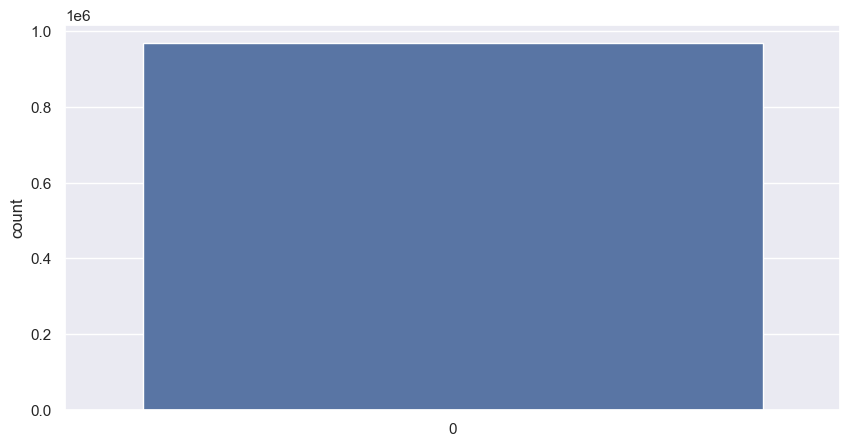

In [16]:
# load data from a csv file
data = pd.read_csv('data.csv', parse_dates=['date'], index_col='date')

# create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# plot the time series data
ax.plot(data.index, data['value'], color='blue')

# set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Graph')

# format the x-axis tick labels
date_format = '%Y-%m-%d'  # set the date format
date_formatter = plt.DateFormatter(date_format)  # create a date formatter object
ax.xaxis.set_major_formatter(date_formatter)  # set the formatter for the x-axis ticks

# display the plot
plt.show()